Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
## librerias necesarias
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
## lectura de archivos

# lista de archivos
lista = glob.glob('precios/*xls*')
archivos = pd.DataFrame()

# lectura en ciclo y concatenacion de dataframes
for file in lista:
    archivos = pd.concat([archivos,pd.read_excel(file,header=None)],sort=False,ignore_index=True)

In [3]:
# cabecera de archivos
archivos.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Precio Bolsa Nacional ($/kWh) 1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fecha,0,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,...,16.000,17.000,18.000,19.000,20.000,21.000,22.000,23.000,NaN,NaN
4,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073,NaN,NaN


In [4]:
## organizar archivos primera parte

archivos = archivos[list(range(25))] # quitar columnas extras
archivos = archivos[archivos[0].notnull()] # quitar nulos con respecto a la primera columna
archivos = archivos[archivos[0] != 'Fecha'] # quitar registros que contenga "Fecha" en la primera columna
archivos = archivos[archivos[0].str.contains('P')!=True] # quitar registros que contengan la letra "P" en la primera columna

In [5]:
print(archivos.head()) # mostrar primeras filas
print('(rows,cols) = ', archivos.shape) # mostrar tamano del dataframe 

           0      1      2      3      4      5      6      7      8      9   \
4  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
5  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
6  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
7  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
8  1995-07-24      1  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       15     16     17     18      19      20      21     22     23  \
4  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
5  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
6  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
7  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
8  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      24  
4  1.073  
5  1.000  
6  1.073  
7  1.0

In [6]:
# organizar archivos parte 2
organizado = pd.melt(archivos, id_vars = 0) # pivotea el dataframe con clave la columna 0 y el resto como variables y valores
organizado['variable'] = organizado['variable'].apply(lambda x: x-1) # cambia las horas para convertirlas de 1:24 a 0:23
organizado = organizado.infer_objects() # automaticamente reconoce los tipos de la columna variable y value
organizado = organizado.rename(index=str,columns={0:'fecha','variable':'hora','value':'precio'}) # renombre de las columnas
organizado['fecha'] = pd.to_datetime(organizado['fecha']) # convierte la columna fecha en tipo de dato fecha

In [7]:
print(organizado.head(10)) # mostrar primeras 10 filas 
print('(rows,cols) = ', organizado.shape) # mostrar tamano del dataframe

       fecha  hora  precio
0 1995-07-20     0     NaN
1 1995-07-21     0   1.073
2 1995-07-22     0   1.073
3 1995-07-23     0   1.073
4 1995-07-24     0   1.000
5 1995-07-25     0   0.990
6 1995-07-26     0   0.500
7 1995-07-27     0   0.500
8 1995-07-28     0   0.000
9 1995-07-29     0   1.000
(rows,cols) =  (201600, 3)


**2.--** Compute e imprima el número de registros con datos faltantes.

In [8]:
# se filtran nulos y valores en cero y contar el numero de registros
sum(organizado['precio'].isna()) + sum(organizado['precio'] == 0)

118

**3.--** Compute e imprima el número de registros duplicados.

In [9]:
# mostrar suma de registros duplicados
sum(organizado.duplicated())

1759

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [10]:
organizado = organizado[organizado.duplicated()==False] # elimina los registros duplicados
organizado = organizado[organizado['precio'].isna() == False] # elimina los registros faltantes
organizado['fecha'].count()

199819

In [11]:
# crea una copia del dataframe eliminando los valores en cero
organizado2 = organizado[organizado['precio'] != 0].copy()
organizado2['fecha'].count() # muestra los registros de este nuevo dataframe

199723

**5.--** Compute y grafique el precio primedio diario.

In [12]:
# crear tabla de promedio diario con precios cero incluidos
prom_diario = organizado.groupby(organizado['fecha'].dt.day).mean()['precio']
prom_diario

fecha
1     107.854329
2     108.913259
3     110.298928
4     111.968630
5     111.388790
6     111.712212
7     111.188443
8     110.057708
9     108.712296
10    105.800706
11    106.111738
12    106.914213
13    107.512270
14    108.276894
15    107.808577
16    108.689072
17    107.165993
18    107.465735
19    105.367401
20    104.312990
21    105.067687
22    105.324493
23    106.490087
24    106.689323
25    106.817565
26    106.574071
27    106.083161
28    106.621820
29    106.125771
30    104.633796
31    101.803295
Name: precio, dtype: float64

In [13]:
# crear tabla de promedio diario con precios cero sin incluir
prom_diario2 = organizado2.groupby(organizado2['fecha'].dt.day).mean()['precio']
prom_diario2

fecha
1     108.084436
2     108.913259
3     110.298928
4     112.002694
5     111.388790
6     111.712212
7     111.188443
8     110.074508
9     108.762096
10    106.027260
11    106.127935
12    106.963189
13    107.577946
14    108.276894
15    107.808577
16    108.689072
17    107.165993
18    107.465735
19    105.367401
20    104.312990
21    105.099651
22    105.420680
23    106.587353
24    106.754259
25    106.817565
26    106.590280
27    106.083161
28    106.735438
29    106.177422
30    104.807779
31    102.202524
Name: precio, dtype: float64

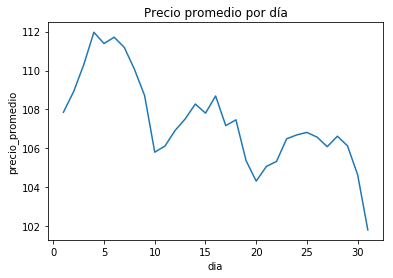

In [14]:
# se grafica el precio promedio como linea de tiempo
ax = prom_diario.plot.line()

ax.set_xlabel('dia') # titulo del eje x
ax.set_ylabel('precio_promedio') # titulo del eje y
ax.set_title('Precio promedio por día'); # titulo general

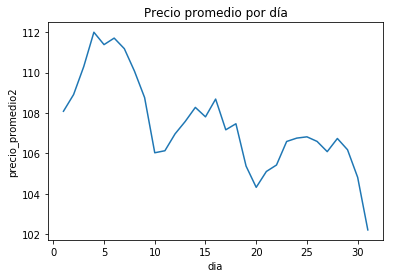

In [15]:
# se grafica el precio promedio como linea de tiempo excluyendo los precios cero
ax = prom_diario2.plot.line()

ax.set_xlabel('dia') # titulo del eje x
ax.set_ylabel('precio_promedio2') # titulo del eje y
ax.set_title('Precio promedio por día'); # titulo general

**6.--** Compute y grafique el precio máximo por mes.

In [16]:
# crear tabla de maximo mensual con precios cero incluidos
max_mes = organizado.groupby(organizado['fecha'].dt.month).max()['precio']
max_mes

fecha
1      865.477082
2      869.442024
3      884.836657
4      807.500399
5      686.494571
6      474.110743
7      445.329386
8      441.242919
9     1495.042973
10    2821.520551
11     823.069323
12     840.227945
Name: precio, dtype: float64

In [17]:
# crear tabla de maximo mensual con precios cero sin incluir
max_mes2 = organizado2.groupby(organizado2['fecha'].dt.month).max()['precio']
max_mes2

fecha
1      865.477082
2      869.442024
3      884.836657
4      807.500399
5      686.494571
6      474.110743
7      445.329386
8      441.242919
9     1495.042973
10    2821.520551
11     823.069323
12     840.227945
Name: precio, dtype: float64

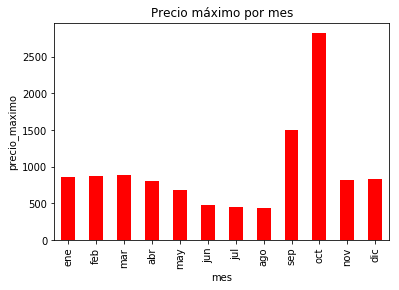

In [18]:
# se grafica el precio maximo por mes como barras con precio cero incluido
ax = max_mes.plot.bar(colormap='prism')

# se formatea el grafico
ax.set_xlabel('mes') # titulo eje x
ax.set_ylabel('precio_maximo') # titulo eje y
ax.set_title ('Precio máximo por mes') # titulo general
ax.set_xticklabels(['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic',], 
                  rotation = 'vertical'); # etiqueta datos eje x

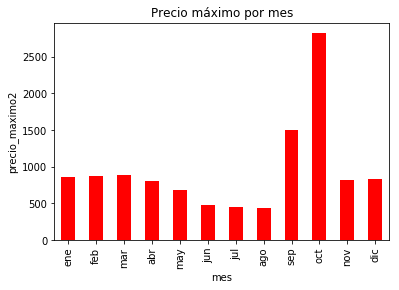

In [19]:
# se grafica el precio maximo por mes como barras con precio cero sin incluir
ax = max_mes2.plot.bar(colormap='prism')

# se formatea el grafico
ax.set_xlabel('mes') # titulo eje x
ax.set_ylabel('precio_maximo2') # titulo eje y
ax.set_title ('Precio máximo por mes') # titulo general
ax.set_xticklabels(['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic',], 
                  rotation = 'vertical'); # etiqueta datos eje x

**7.--** Compute y grafique el precio mínimo mensual.

In [20]:
# crear tabla de minimo mensual con precios cero incluidos
min_mes = organizado.groupby(organizado['fecha'].dt.month).min()['precio']
min_mes

fecha
1     1.073
2     1.076
3     1.255
4     1.254
5     0.000
6     0.000
7     0.000
8     0.000
9     1.073
10    0.000
11    1.072
12    1.074
Name: precio, dtype: float64

In [21]:
# crear tabla de minimo mensual con precios cero sin incluir
min_mes2 = organizado2.groupby(organizado2['fecha'].dt.month).min()['precio']
min_mes2

fecha
1     1.073
2     1.076
3     1.255
4     1.254
5     1.000
6     1.000
7     0.100
8     0.400
9     1.073
10    0.500
11    1.072
12    1.074
Name: precio, dtype: float64

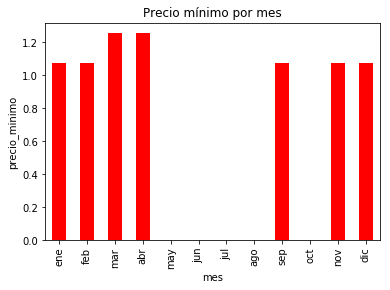

In [22]:
# se grafica el precio minimo por mes como barras
ax = min_mes.plot.bar(colormap='prism')

# se formatea el grafico
ax.set_xlabel('mes') # titulo eje x
ax.set_ylabel('precio_minimo') # titulo eje y
ax.set_title ('Precio mínimo por mes') # titulo general
ax.set_xticklabels(['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic',], 
                  rotation = 'vertical'); # etiqueta datos eje x

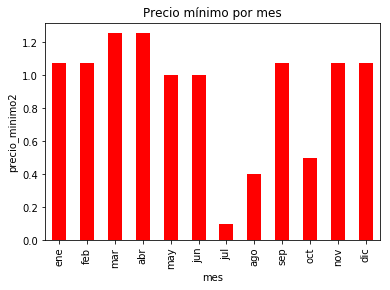

In [23]:
# se grafica el precio minimo por mes como barras
ax = min_mes2.plot.bar(colormap='prism')

# se formatea el grafico
ax.set_xlabel('mes') # titulo eje x
ax.set_ylabel('precio_minimo2') # titulo eje y
ax.set_title ('Precio mínimo por mes') # titulo general
ax.set_xticklabels(['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic',], 
                  rotation = 'vertical'); # etiqueta datos eje x

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [24]:
# se crea un data frame que tenga los dos valores solicitados
mes = organizado.groupby(organizado['fecha'].dt.month).agg(['max','mean'])['precio']
mes = mes.rename(index=str,columns={'max':'precio_maximo','mean':'precio_promedio'}) # se renombran las columnas

# vista del dataframe
mes

,precio_maximo,precio_promedio
fecha,,
1,865.477082,111.924490
2,869.442024,125.139288
3,884.836657,125.732944
4,807.500399,106.910424
5,686.494571,91.602250
6,474.110743,83.849155
7,445.329386,79.269063
8,441.242919,83.978671
9,1495.042973,107.400101


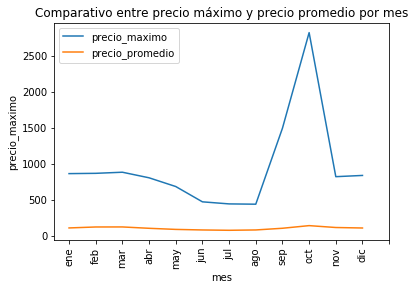

In [25]:
# se grafican ambos datos como linea de tiempo
ax = mes.plot.line()

# se formatea el grafico
ax.set_xlabel('mes') # titulo eje x
ax.set_xticks(range(13)) # valores eje x
ax.set_ylabel('precio_maximo') # titulo eje y
ax.set_xticklabels(['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic',], 
                  rotation = 'vertical') # etiqueta datos eje x
ax.set_title('Comparativo entre precio máximo y precio promedio por mes');

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [26]:
# se agrega el dia de la semana y el nombre del dia a los dataframes
organizado['nombredia'] = organizado['fecha'].dt.day_name()
organizado['numerodia'] = organizado['fecha'].dt.weekday
organizado2['nombredia'] = organizado2['fecha'].dt.day_name()
organizado2['numerodia'] = organizado2['fecha'].dt.weekday

In [27]:
# se crea una tabla que contenga todos los precio maximo por dia 
max_precio = organizado2.groupby('fecha').max()['precio']

# se crea un contenedor de dataframes vacios para ir agregando los datos de los precios maximos
max_precio_df = pd.DataFrame()

# se crea el iterador
for i in range(len(max_precio)):
    
    max_precio_df = pd.concat([max_precio_df,
                               # con el siguiente comando se filtra el dataframe incluyendo las fechas
                               organizado2[(organizado2['fecha'] == max_precio.index[i]) & 
                                           (organizado2['precio'] == max_precio[i])][['fecha','hora','precio','nombredia']]
                              ],
                              ignore_index = True
                             )

# se filtra por los valores de semana
max_precio2 = max_precio_df[(max_precio_df['nombredia'] != 'Saturday') & (max_precio_df['nombredia'] != 'Sunday')]

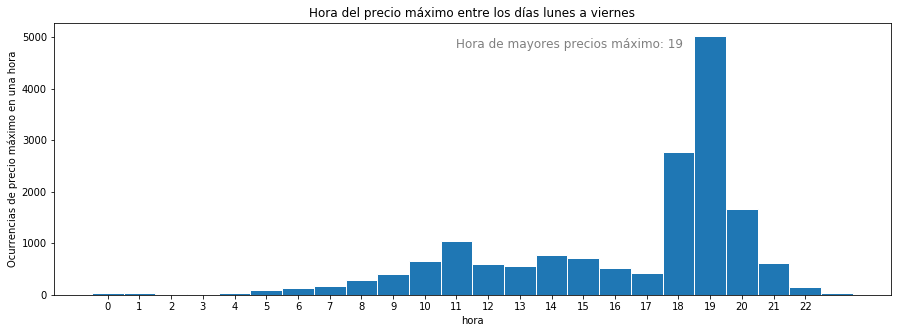

In [37]:
# se crea el grafico, se establece el numero de barras del histograma y el color del borde
fig = plt.hist(max_precio2['hora'],bins = 24, range = (0,24), align = 'left', edgecolor = 'w')

# se formatea el grafico
plt.xticks(range(23)) # ajustar eje x
plt.xlabel('hora') # titulo eje x
plt.ylabel('Ocurrencias de precio máximo en una hora') # titulo eje y
plt.title('Hora del precio máximo entre los días lunes a viernes') # titulo general
plt.rcParams['figure.figsize'] = [15,5] # tamano del grafico
plt.text(11,4800, 'Hora de mayores precios máximo: 19', fontsize = 12, alpha = 0.5); # ajuste de texto explicativo

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [29]:
# crear dataframe que contenga solo el dia sabado y sus precios maximos por hora
dia_sab = max_precio_df[(max_precio_df['nombredia'] == 'Saturday')]

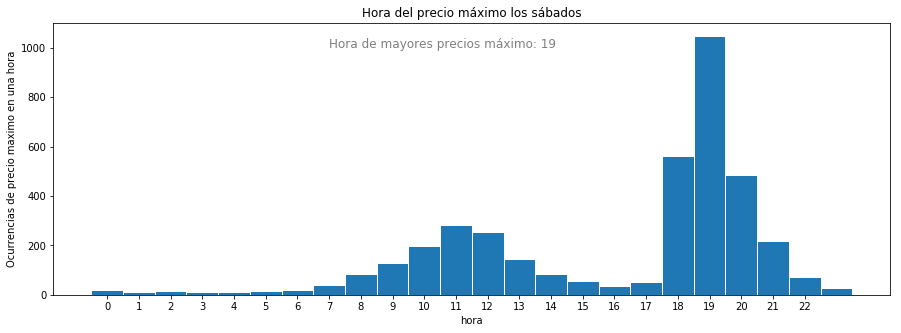

In [30]:
# crear grafico
fig = plt.hist(dia_sab['hora'],bins = 24, range = (0,24), align = 'left', edgecolor = 'w')

# se formatea el grafico
plt.xticks(range(23)) # ajustar eje x
plt.xlabel('hora') # titulo eje x
plt.ylabel('Ocurrencias de precio maximo en una hora') # titulo eje y
plt.title('Hora del precio máximo los sábados') # titulo general
plt.rcParams['figure.figsize'] = [15,5] # tamano del grafico
plt.text(7,1000, 'Hora de mayores precios máximo: 19', fontsize = 12, alpha = 0.5); # ajuste de texto explicativo

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [31]:
# crear dataframe que contenga solo el dia sabado y sus precios maximos por hora
dia_dom = max_precio_df[(max_precio_df['nombredia'] == 'Sunday')]

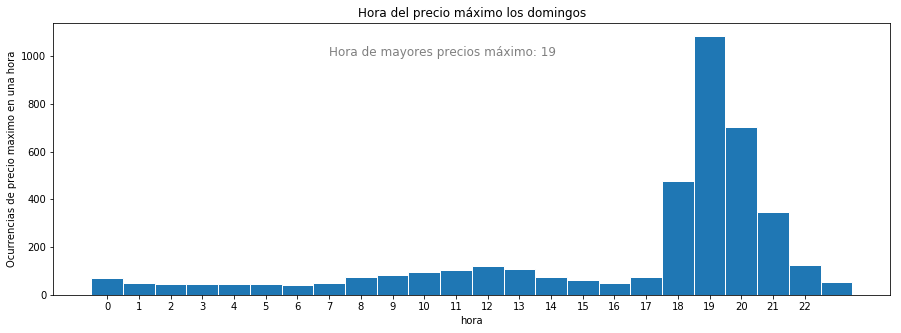

In [32]:
# crear grafico
fig = plt.hist(dia_dom['hora'],bins = 24, range = (0,24), align = 'left', edgecolor = 'w')

# se formatea el grafico
plt.xticks(range(23)) # ajustar eje x
plt.xlabel('hora') # titulo eje x
plt.ylabel('Ocurrencias de precio maximo en una hora') # titulo eje y
plt.title('Hora del precio máximo los domingos') # titulo general
plt.rcParams['figure.figsize'] = [15,5] # tamano del grafico
plt.text(7,1000, 'Hora de mayores precios máximo: 19', fontsize = 12, alpha = 0.5); # ajuste de texto explicativo

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [33]:
# crear tabla de precios minimos eliminando los ceros, agrupada por anio
min_precio = organizado2.groupby(organizado2['fecha'].dt.year).min()['precio']

# se crea un contenedor de dataframes vacios para ir agregando las fechas de los precios minimos
min_precio_df = pd.DataFrame()

# se crea el iterador
for i in range(24):
    
    min_precio_df = pd.concat([min_precio_df,
                               # con el siguiente comando se filtra el dataframe incluyendo las fechas
                               organizado2[(organizado2['precio']==list(min_precio)[i]) & 
                                          (organizado2['fecha'].dt.year==min_precio.index[i])][['fecha','precio']][0:1]
                              ],
                              ignore_index = True
                             )

In [34]:
# se crea la columna anio y se visualiza la tabla
min_precio_df['anio'] = min_precio_df['fecha'].dt.year
min_precio_df

,fecha,precio,anio
0,1995-07-23,0.100000,1995
1,1996-07-24,0.700000,1996
2,1997-07-15,10.882310,1997
3,1998-07-12,13.847330,1998
4,1999-03-28,18.359530,1999
5,2000-03-25,21.531167,2000
6,2001-08-20,24.822879,2001
7,2002-04-29,26.777682,2002
8,2003-02-14,37.013438,2003
9,2004-03-29,32.252998,2004


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [35]:
# se prepara la informacion
organizado2['dia'] = organizado2['fecha'].dt.day

# se crea el promedio diario por mes
promedio = organizado2.groupby([organizado2['fecha'].dt.month,'dia']).mean()['precio']

# se crea el promedio mensual y se ajusta a cada dia del anio
mes_serie = pd.Series()
for i in range(12):
    
    mes_serie = mes_serie.append(pd.Series([promedio.unstack().T.mean()[i+1]]*sum(promedio.unstack().T[i+1].isna()!=True)), 
                                 ignore_index = True)

# se muestra la cabecera del mes
print(mes_serie.head())
print(mes_serie.tail())

0    111.92449
1    111.92449
2    111.92449
3    111.92449
4    111.92449
dtype: float64
361    111.098455
362    111.098455
363    111.098455
364    111.098455
365    111.098455
dtype: float64


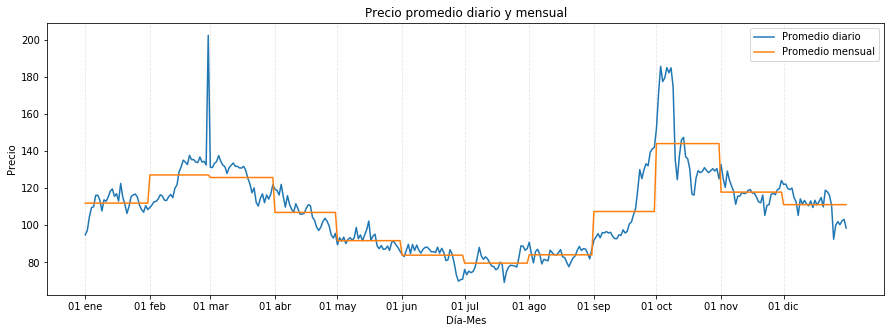

In [36]:
# se crean contenedores de los rangos de dias en los que se mueve cada mes
dias = [0,]
dias2 = 0

# se crea el iterador
for i in range(12):
    
    dias2 += (sum(promedio.unstack().T[i+1].isna()!=True))
    dias.append(dias2)

# se grafica  lo solicitado
promedio.plot() # promedio diario
mes_serie.plot() # promedio mensual

# se formatea el grafico
plt.title('Precio promedio diario y mensual') # titulo general
plt.xlabel('Día-Mes') # titulo eje x
plt.ylabel('Precio') # titulo eje y
plt.xticks(dias[:-1],
           ['01 ene','01 feb','01 mar','01 abr','01 may','01 jun','01 jul','01 ago','01 sep','01 oct','01 nov','01 dic',]
          ) # se ajusta el eje y
plt.grid(b = True, which = 'major', axis = 'x', alpha = 0.3, linestyle = '--') # se agrega una linea para indicar inicio de mes
plt.legend(['Promedio diario','Promedio mensual']); # se agrega la leyenda

# Documentación

https://stackoverflow.com/questions/9969677/why-are-the-axes-switched-on-my-pyplot-histogram
https://matplotlib.org/3.1.0/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py
https://jdvelasq.github.io/ciencia-de-los-datos/docs/python/visualizacion-de-datos-usando-matplotlib.html
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html
https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.set_title.html
https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
https://stackoverflow.com/questions/51080491/matplotlib-how-to-change-figsize-for-double-bar-plot
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.text.html
https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.grid.html
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html